<a href="https://colab.research.google.com/github/mcalmeida13/math-machine-learning/blob/main/overffiting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
A = np.array([1,2,3])

In [3]:
np.power(A,2)

array([1, 4, 9])

In [4]:
np.power(A,3)

array([ 1,  8, 27])

In [5]:
#Function that creates the polynomial

def make_poly(X,deg):
  # l = []
  n = len(X)
  df = pd.DataFrame()
  df['X0'] = np.ones(n) #Bias
  # columns = ['X0']
  for d in range(int(deg)):
    # data.append(np.power(X,d+1))
    # print(data)
    # columns.append('X'+str(d+1))
    df['X'+str(d+1)] = np.power(X,d+1).T
  
  return df


In [6]:
make_poly(A, 5)

,X0,X1,X2,X3,X4,X5
0,1.0,1,1,1,1,1
1,1.0,2,4,8,16,32
2,1.0,3,9,27,81,243


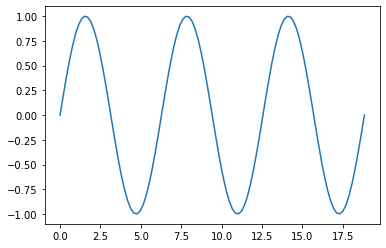

In [7]:
#Artificial data
N = 100
X  = np.linspace(0,6*np.pi,N)
Y = np.sin(X)

plt.plot(X,Y)
plt.show()

In [8]:
make_poly(X,5)

,X0,X1,X2,X3,X4,X5
0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00
1,1.0,0.190400,0.036252,0.006902,0.001314,2.502244e-04
2,1.0,0.380799,0.145008,0.055219,0.021027,8.007181e-03
3,1.0,0.571199,0.326268,0.186364,0.106451,6.080453e-02
4,1.0,0.761598,0.580032,0.441751,0.336437,2.562298e-01
...,...,...,...,...,...,...
95,1.0,18.087958,327.174214,5917.913341,107042.966206,1.936189e+06
96,1.0,18.278357,334.098344,6106.768891,111621.703479,2.040261e+06
97,1.0,18.468757,341.094978,6299.600202,116345.784140,2.148762e+06
98,1.0,18.659156,348.164116,6496.448688,121218.251893,2.261830e+06


In [33]:
def fit(X,Y):
  # print(X.T.dot(X))
  # print(np.dot(X.T,X).shape)
  # print(np.dot(X.T,Y).shape)
  return np.linalg.solve(np.dot(X.T,X),np.dot(X.T,Y))

In [45]:
def fit_and_display(X,Y,sample,deg):
  """
    Fit and display the model for a fixed polynomial degree
    It does only the train set
    Do not calculate the score
  """
  #Separate train test
  n = len(X)
  train_idx = np.random.choice(N,sample)
  Xtrain = X[train_idx]
  Ytrain = Y[train_idx]

  # Plot the train set
  plt.scatter(Xtrain,Ytrain)
  plt.show()


  # Fit the polynomial
  Xtrain_poly = make_poly(Xtrain,deg)
  w = fit(Xtrain_poly, Ytrain)

  # Display the polynomial
  X_poly = make_poly(X, deg)
  Yhat = X_poly.dot(w)
  plt.plot(X,Y)
  plt.plot(X, Yhat)
  plt.scatter(Xtrain,Ytrain)
  plt.title("deg = %d" % deg)
  plt.show()

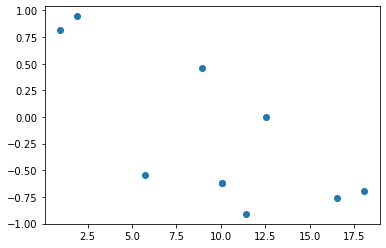

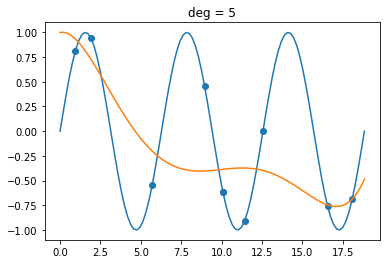

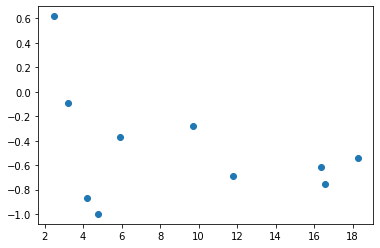

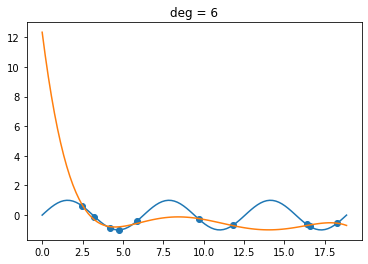

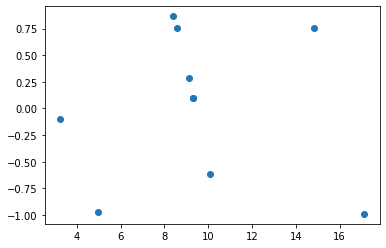

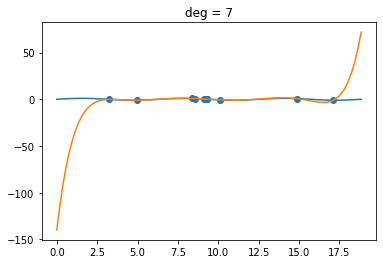

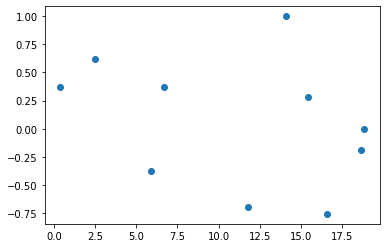

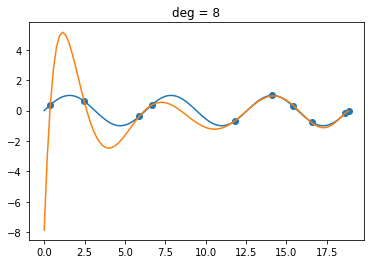

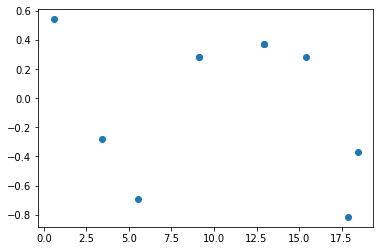

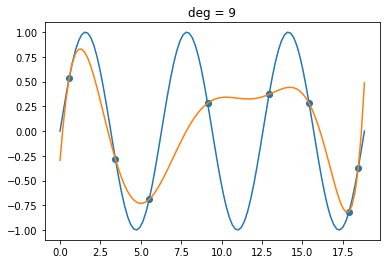

In [46]:
for deg in (5,6,7,8,9):
  fit_and_display(X,Y,10,deg)

In [49]:
def get_mse(Y,Yhat):
  d = Y - Yhat
  return d.dot(d)/len(d)

In [50]:
def plot_train_vs_test_curves(X,Y,sample=20,max_deg=20):
    """
      Fit and display the model for a variable polynomial degree
      It goes from 1 to max degreee
      It fits the model for both train and test set
      Calculate train and test score
    """
    #Separate train test
    n = len(X)
    train_idx = np.random.choice(N,sample)
    # Train set
    Xtrain = X[train_idx]
    Ytrain = Y[train_idx]

    # Index not in the trainset are the test index
    test_idx = [idx for idx in range(N) if idx not in train_idx]
    Xtest = X[test_idx]
    Ytest = Y[test_idx]

    #List to save the model score
    mse_trains = []
    mse_tests = []
    for deg in range(max_deg):
      # Fit the polynomial and calculate the score for the train set
      Xtrain_poly = make_poly(Xtrain,deg)
      w = fit(Xtrain_poly, Ytrain)
      Yhat_train = Xtrain_poly.dot(w)
      mse_train = get_mse(Ytrain, Yhat_train)

      # Fit the polynomial and calculate the score for the test set
      Xtest_poly = make_poly(Xtest,deg)
      w = fit(Xtest_poly, Ytest)
      Yhat_test = Xtest_poly.dot(w)
      mse_test = get_mse(Ytest, Yhat_test)

      # Append the result to a list
      mse_trains.append(mse_train)
      mse_tests.append(mse_test)

    plt.plot(mse_trains, label="train mse")
    plt.plot(mse_tests, label="test mse")
    plt.legend()
    plt.show()

    plt.plot(mse_trains, label="train mse")
    plt.legend()
    plt.show()

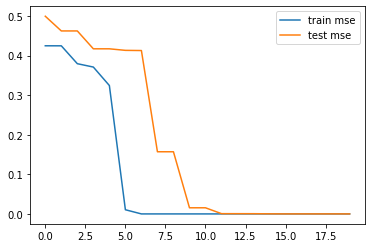

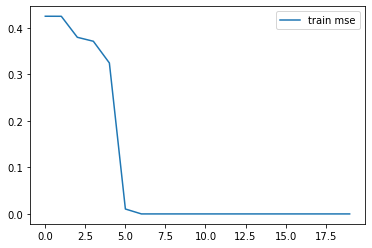

In [58]:
plot_train_vs_test_curves(X, Y,sample = 10)

We see for higher degrees the mean square erro form the train set decrease